In [1]:
from barplots import barplots
import os
import pandas as pd
from glob import glob
import compress_pickle

In [2]:
bad_models = [
    'DeepWalk',
    #'GAE',
    'GF',
    #'GraRep',
    #'HOPE',
    #'LINE',
    'Laplacian',
    #'SDNE',
    'SVD',
    #'node2vec',
    #'struc2vec'
]

Rendering barplots:   0%|          | 0/12 [00:00<?, ?it/s]

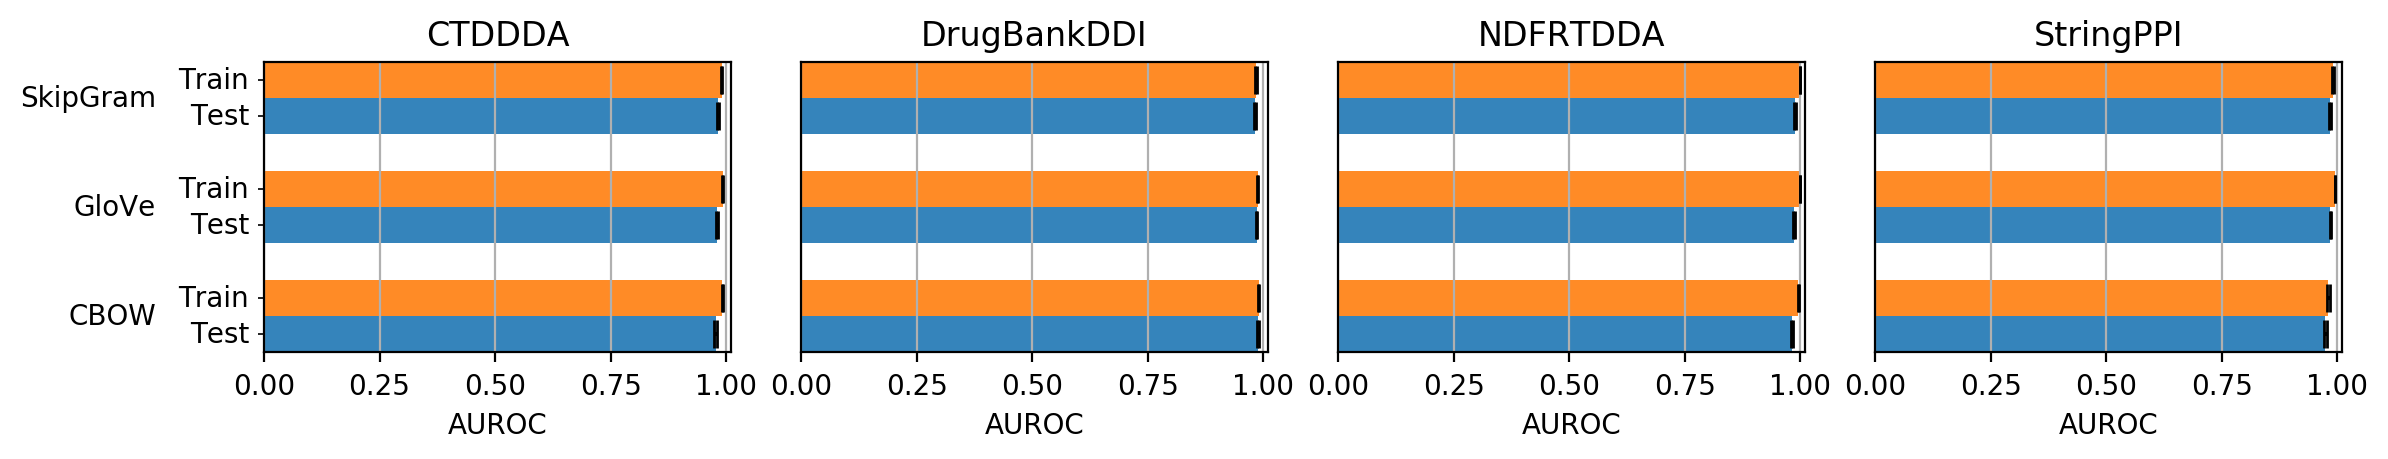

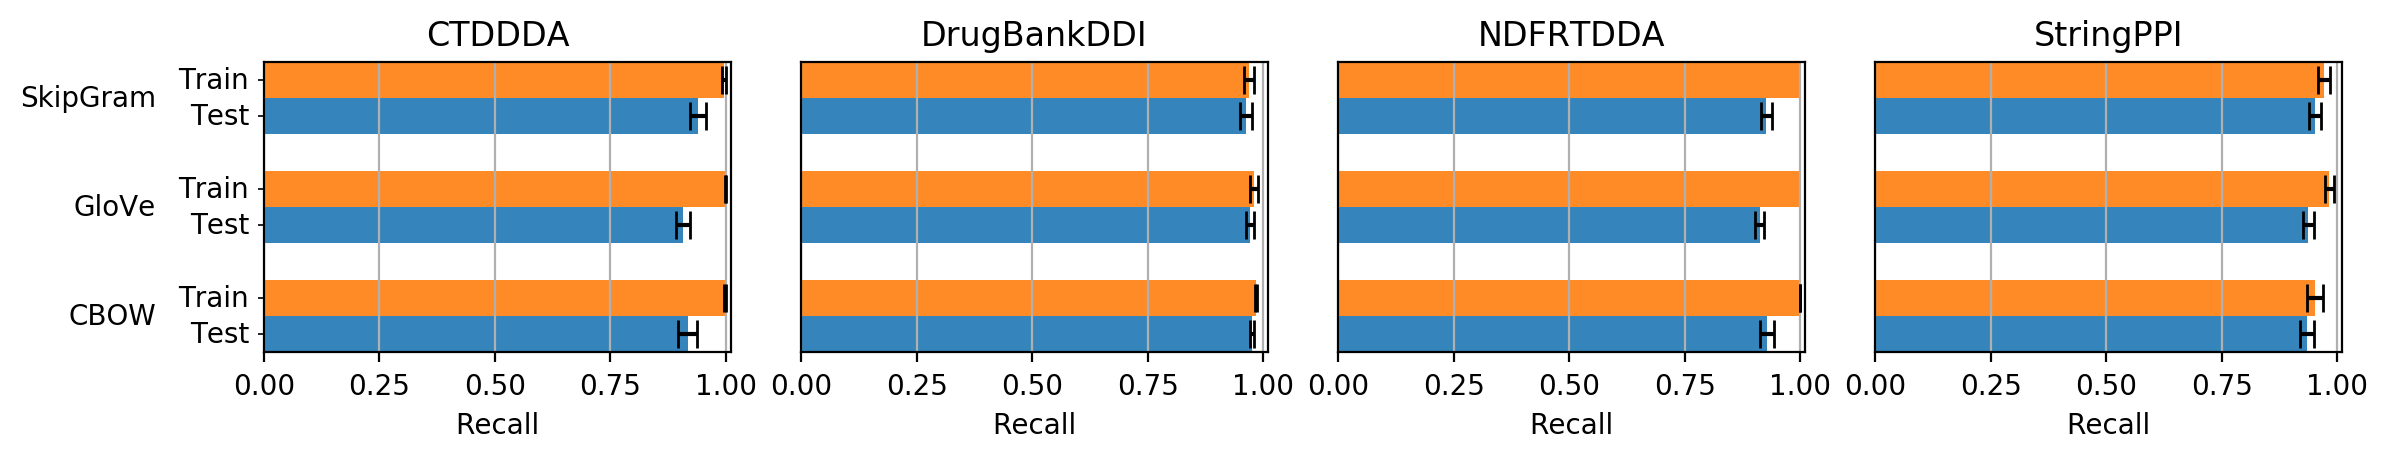

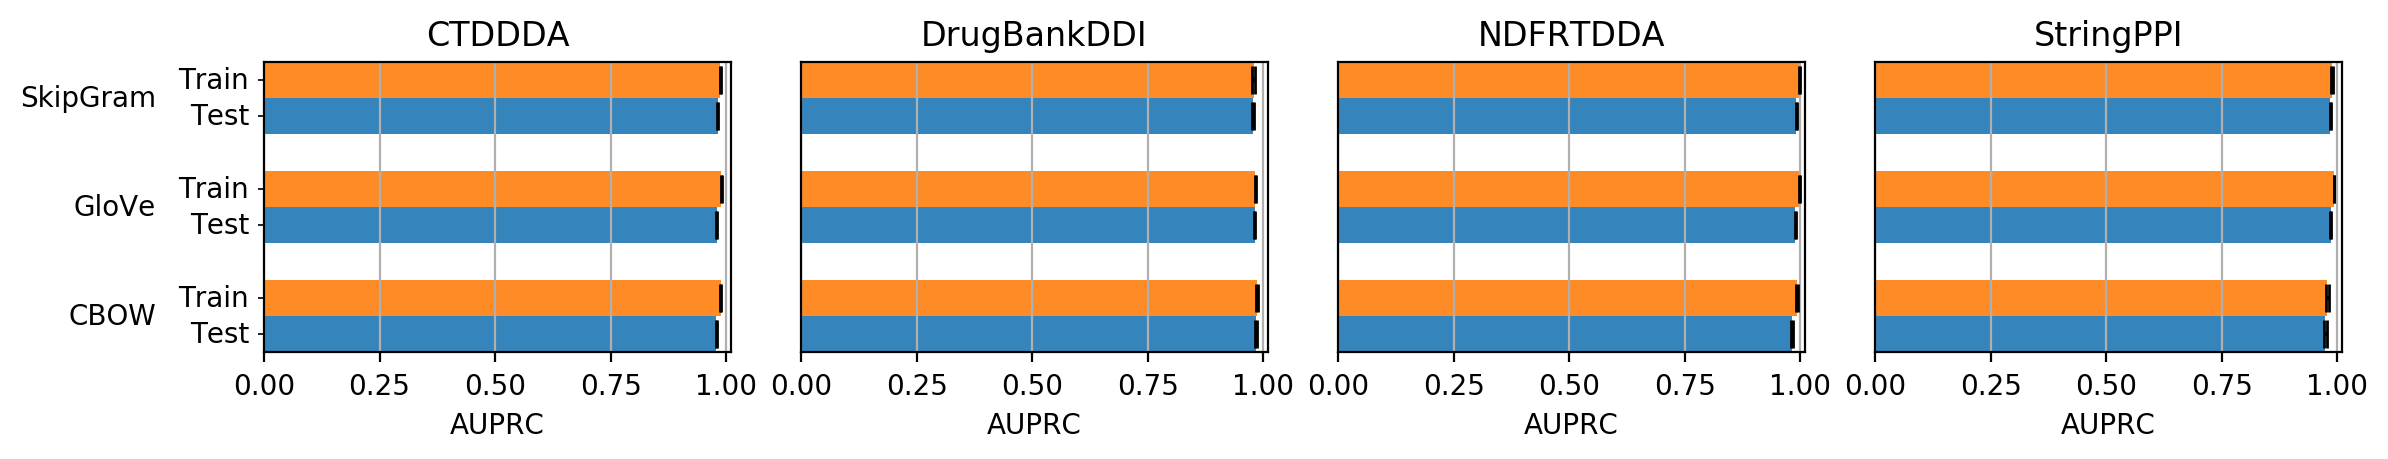

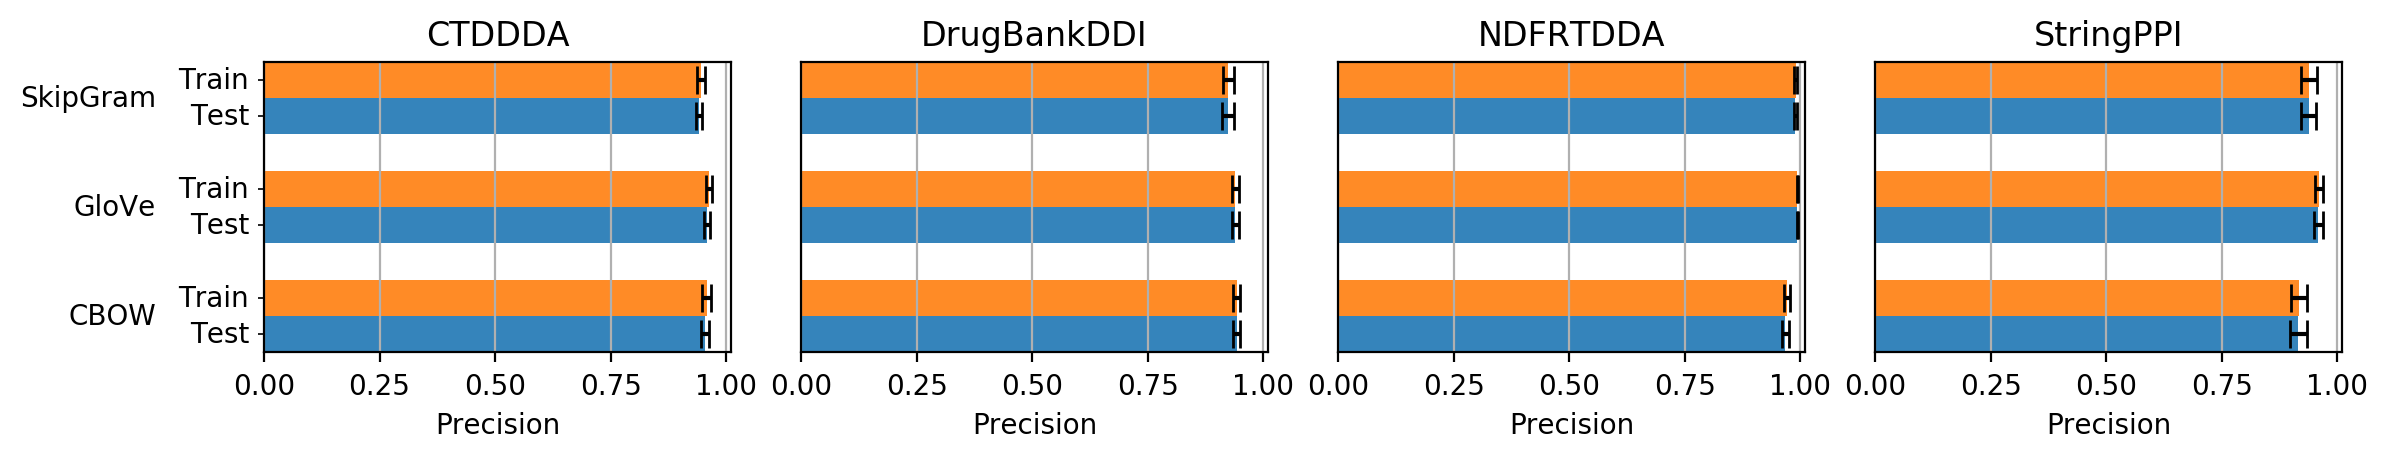

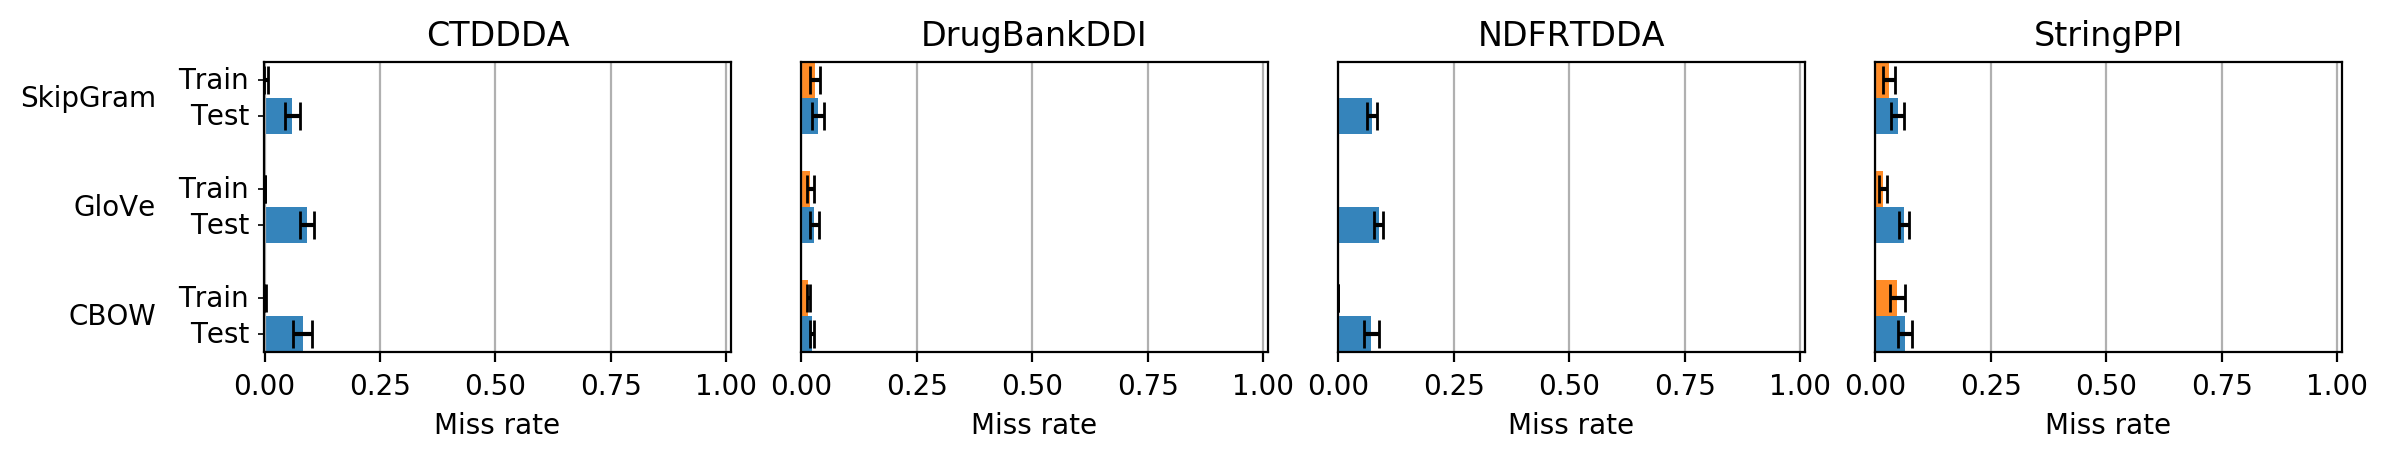

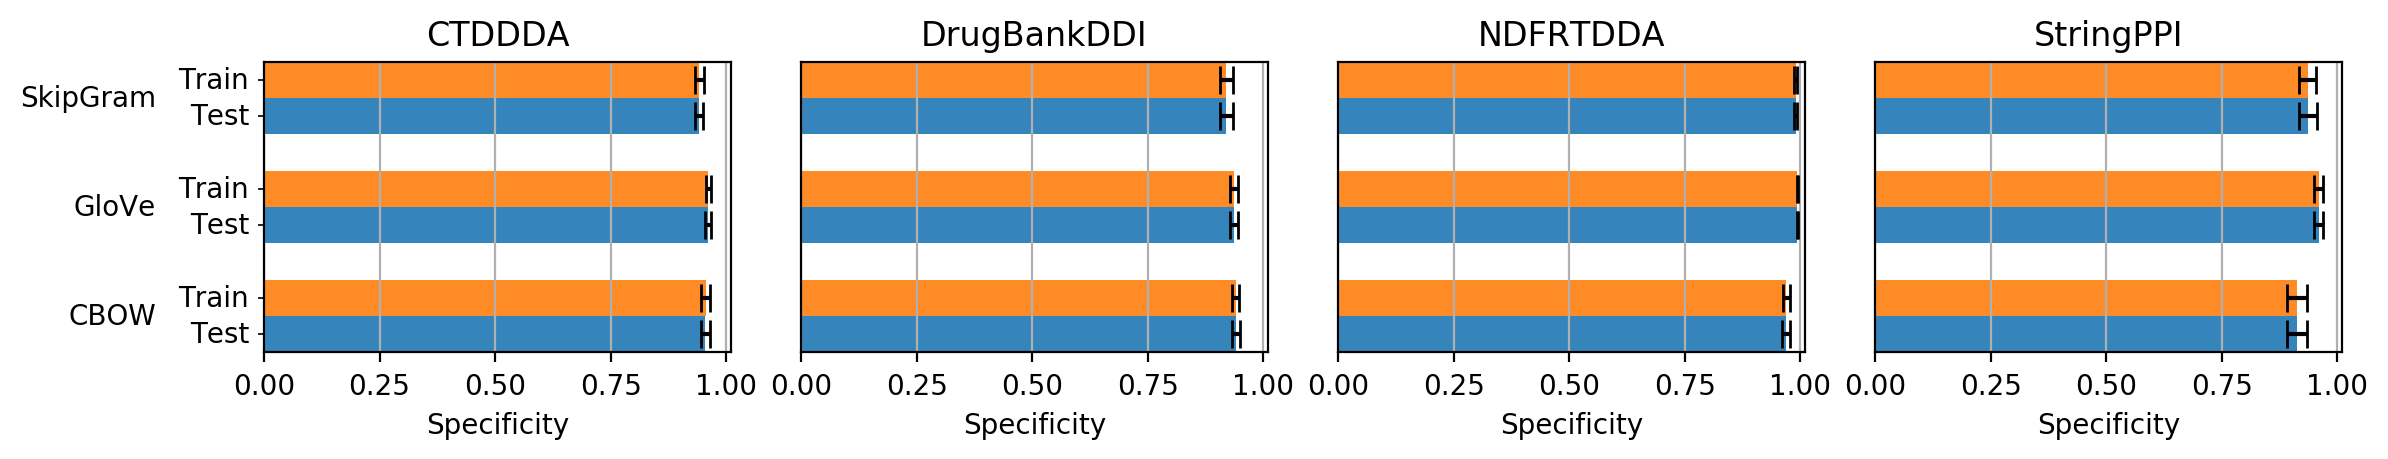

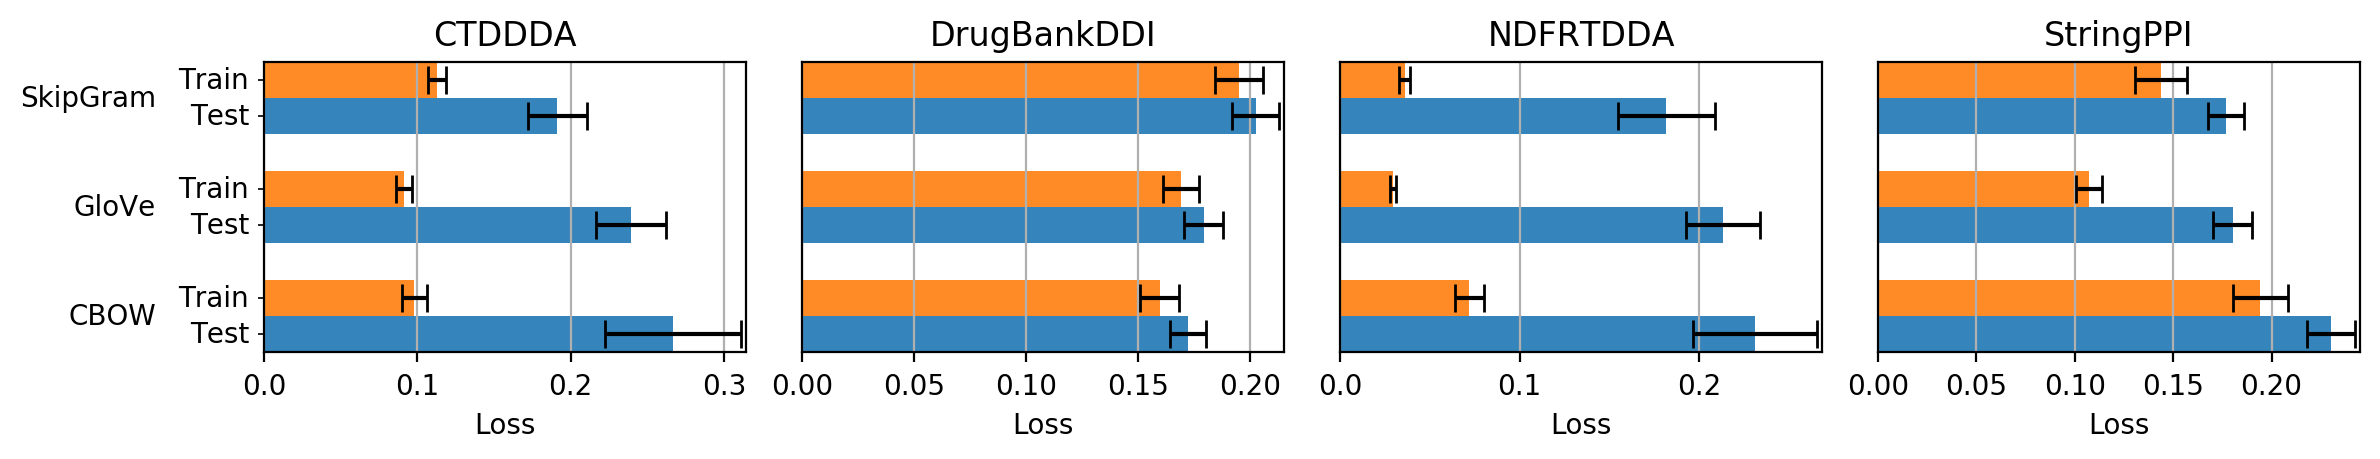

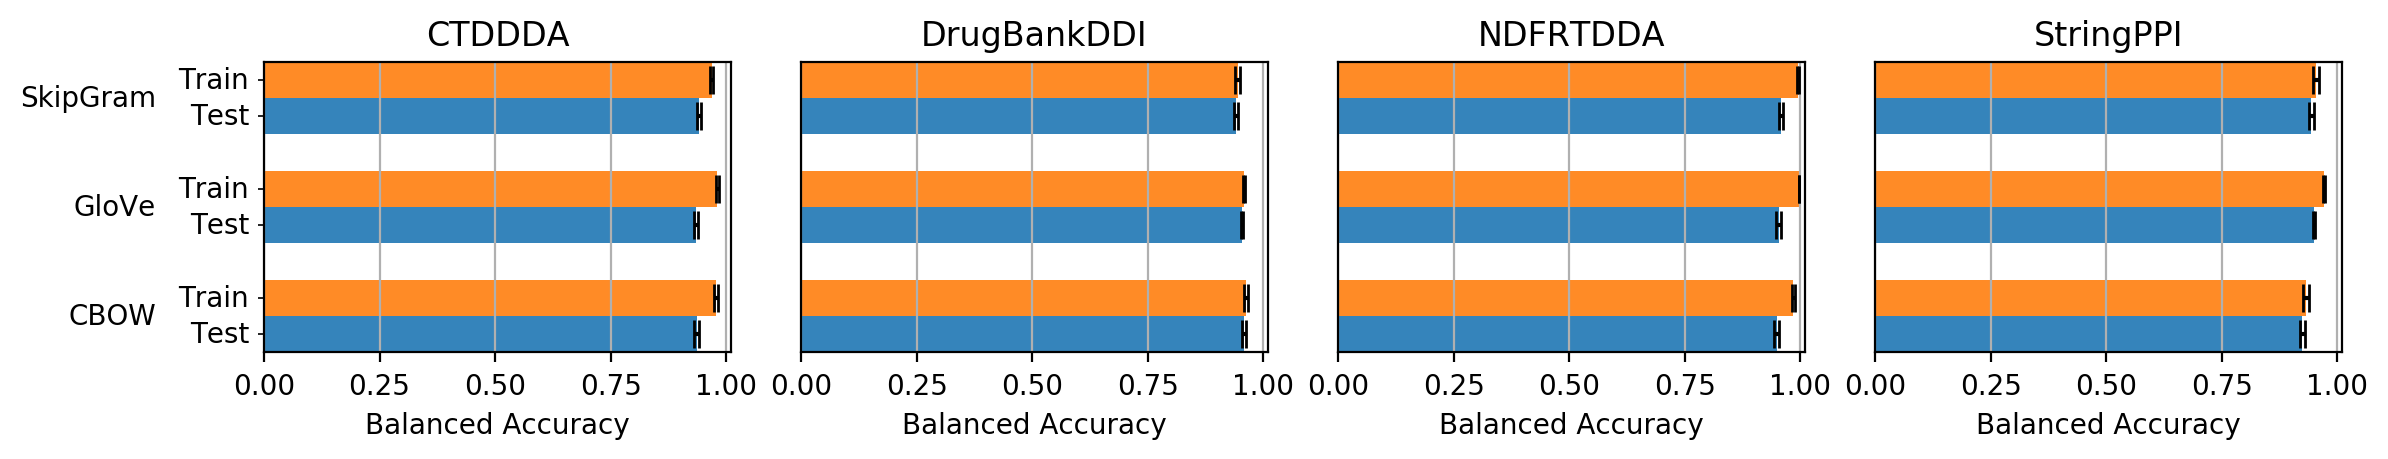

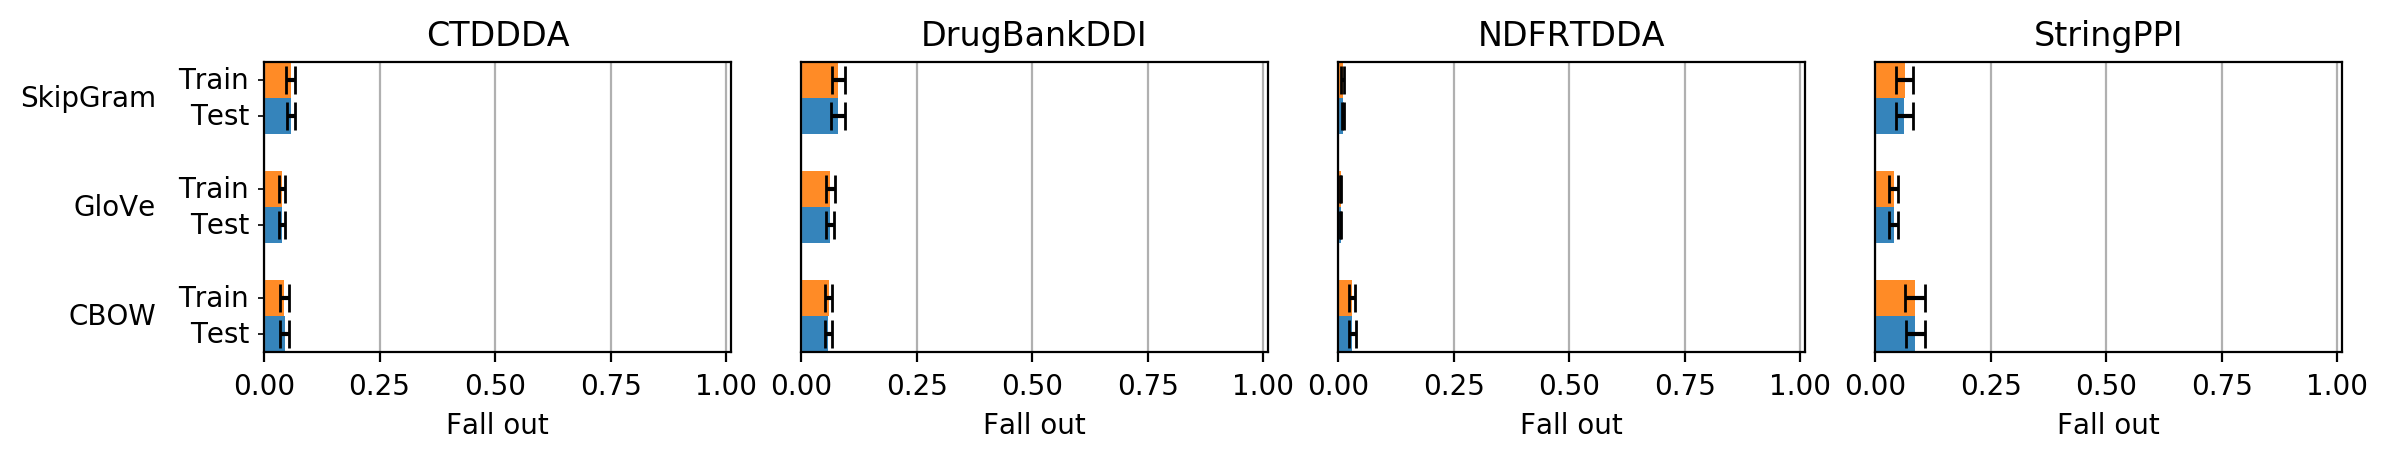

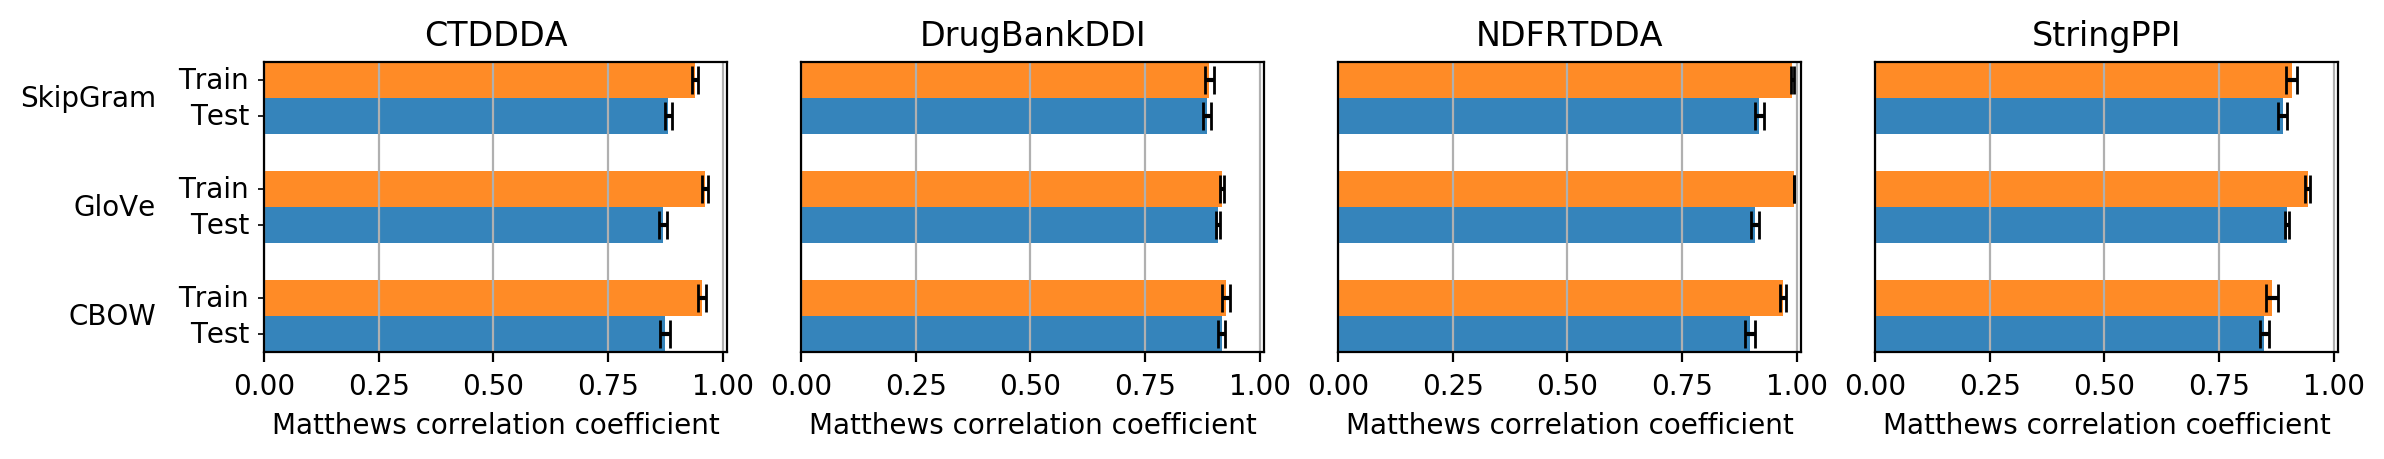

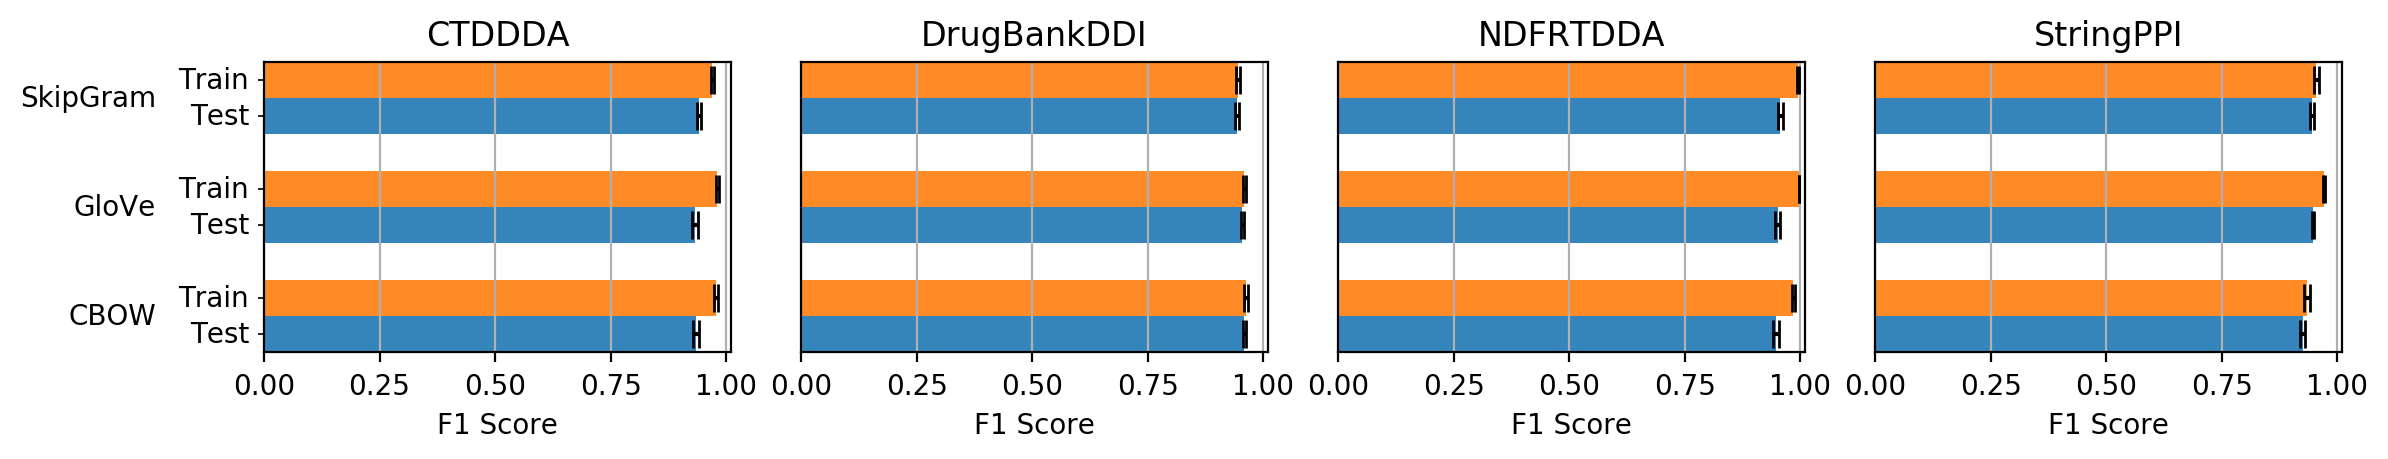

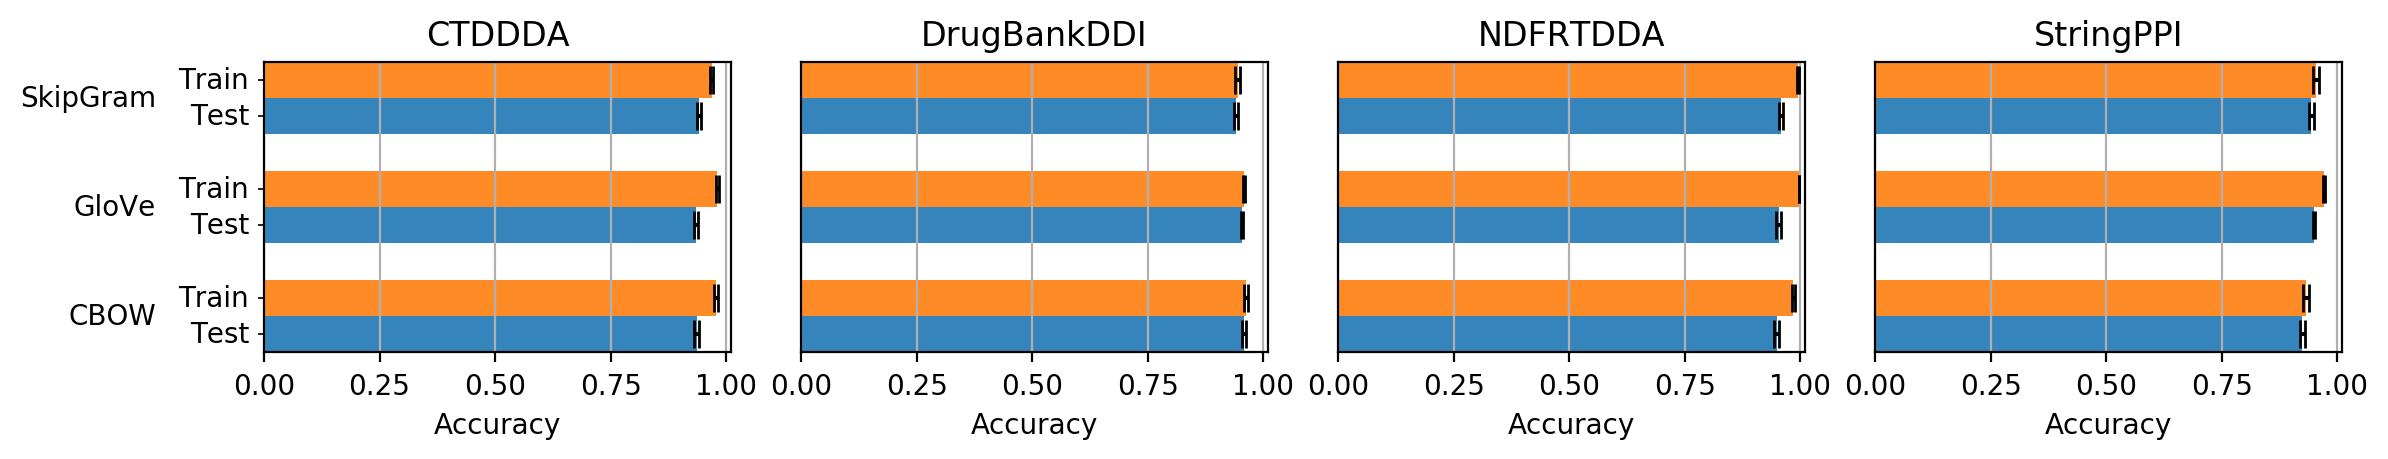

In [3]:
grape_results = pd.concat([
    pd.read_csv(path)
    for path in glob("yue_comparison*")
])
grape_results = grape_results[grape_results.trainable==True]
grape_results.drop(columns=["trainable"], inplace=True)
_ = barplots(
    grape_results,
    groupby=["graph", "method", "run_type"],
    height=3,
    path = 'train_test_barplots/{feature}.png',
    subplots=True,
    orientation="horizontal",
    use_multiprocessing=False,
    show_legend=False,
    unique_minor_labels=True
)

In [4]:
grape_results = pd.concat([
    pd.read_csv(path)
    for path in glob("yue_comparison*")
])
grape_results = grape_results[grape_results.trainable==True]
grape_results.drop(columns=["trainable"], inplace=True)
grape_results["work"] = "Grape"
grape_results = grape_results[grape_results.run_type=="test"]
indices = ["graph", "work", "method"]
grape_results = grape_results.groupby(indices).agg(["mean", "std"])
yue = pd.read_csv("yue_results.csv", index_col=[0,1,2], header=[0, 1]).reset_index()
print(yue.method.unique())
yue = yue[~yue.method.isin(bad_models)]
yue["work"] = "Other"
yue = yue.set_index(indices)
all_results = pd.DataFrame(pd.concat([
    grape_results,
    yue
]).to_dict()).drop(columns=["run_type"])

['DeepWalk' 'GAE' 'GF' 'GraRep' 'HOPE' 'LINE' 'Laplacian' 'SDNE' 'SVD'
 'node2vec' 'struc2vec']


In [5]:
all_results = all_results.sort_index()
all_results.to_csv("all_results.csv")

In [6]:
print(all_results[["AUROC", "accuracy", "f1_score"]].reset_index().to_latex(index=False, float_format="{:0.3f}".format))

\begin{tabular}{lllrrrrrr}
\toprule
    level\_0 & level\_1 &   level\_2 & \multicolumn{2}{l}{AUROC} & \multicolumn{2}{l}{accuracy} & \multicolumn{2}{l}{f1\_score} \\
            &  mean &   std &     mean &   std &     mean &   std \\
\midrule
     CTDDDA &   Grape &      CBOW & 0.977 & 0.003 &    0.937 & 0.006 &    0.935 & 0.007 \\
     CTDDDA &   Grape &     GloVe & 0.980 & 0.002 &    0.934 & 0.005 &    0.933 & 0.006 \\
     CTDDDA &   Grape &  SkipGram & 0.982 & 0.002 &    0.941 & 0.004 &    0.941 & 0.005 \\
     CTDDDA &   Other &       GAE & 0.937 & 0.001 &    0.857 & 0.002 &    0.856 & 0.002 \\
     CTDDDA &   Other &    GraRep & 0.960 & 0.001 &    0.899 & 0.002 &    0.900 & 0.002 \\
     CTDDDA &   Other &      HOPE & 0.951 & 0.001 &    0.886 & 0.002 &    0.887 & 0.002 \\
     CTDDDA &   Other &      LINE & 0.965 & 0.001 &    0.904 & 0.001 &    0.904 & 0.001 \\
     CTDDDA &   Other &      SDNE & 0.935 & 0.010 &    0.863 & 0.012 &    0.861 & 0.013 \\
     CTDDDA &   Other &  no

In [7]:
print(all_results.reset_index().drop(
    columns=["level_1", "loss", "balanced_accuracy", "miss_rate", "fall_out", "AUROC", "accuracy", "f1_score"]
).dropna().to_latex(index=False, float_format="{:0.3f}".format))

\begin{tabular}{llrrrrrrrrrr}
\toprule
    level\_0 &  level\_2 & \multicolumn{2}{l}{AUPRC} & \multicolumn{2}{l}{mcc} & \multicolumn{2}{l}{precision} & \multicolumn{2}{l}{recall} & \multicolumn{2}{l}{specificity} \\
            &  mean &   std &  mean &   std &      mean &   std &   mean &   std &        mean &   std \\
\midrule
     CTDDDA &     CBOW & 0.979 & 0.002 & 0.874 & 0.010 &     0.954 & 0.009 &  0.918 & 0.021 &       0.955 & 0.010 \\
     CTDDDA &    GloVe & 0.980 & 0.001 & 0.870 & 0.008 &     0.959 & 0.006 &  0.908 & 0.015 &       0.961 & 0.006 \\
     CTDDDA & SkipGram & 0.981 & 0.001 & 0.882 & 0.008 &     0.941 & 0.007 &  0.940 & 0.016 &       0.941 & 0.009 \\
DrugBankDDI &     CBOW & 0.985 & 0.002 & 0.917 & 0.007 &     0.943 & 0.007 &  0.976 & 0.004 &       0.941 & 0.008 \\
DrugBankDDI &    GloVe & 0.981 & 0.002 & 0.909 & 0.005 &     0.939 & 0.008 &  0.972 & 0.010 &       0.937 & 0.009 \\
DrugBankDDI & SkipGram & 0.978 & 0.003 & 0.884 & 0.009 &     0.924 & 0.012 &  0.963 

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Rendering barplots:   0%|          | 0/3 [00:00<?, ?it/s]

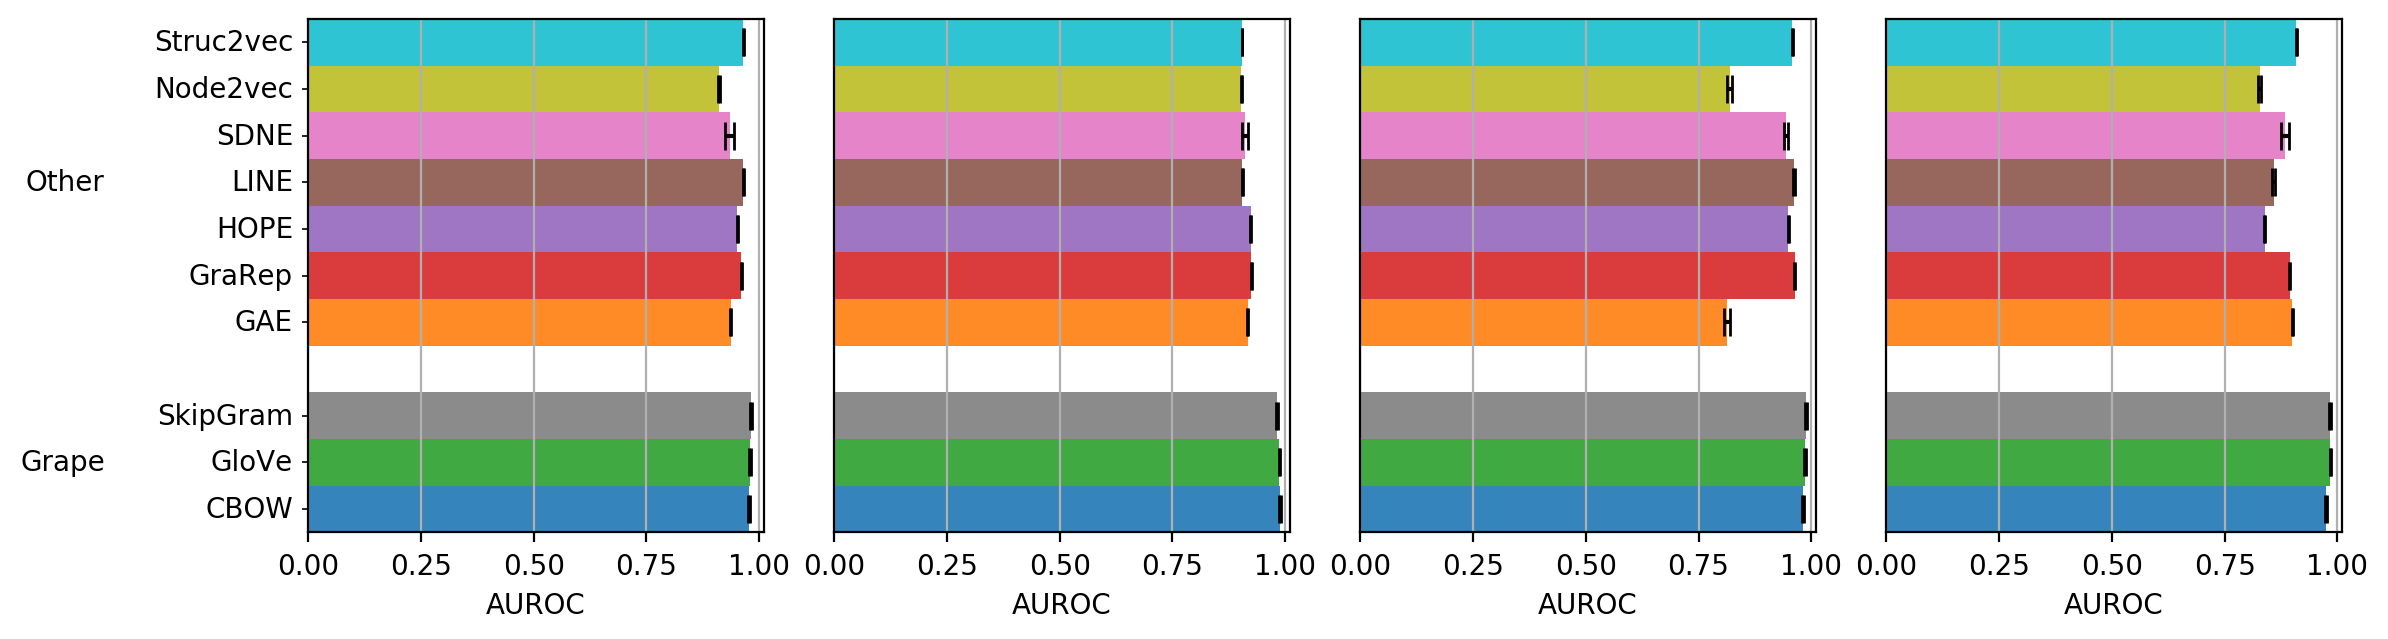

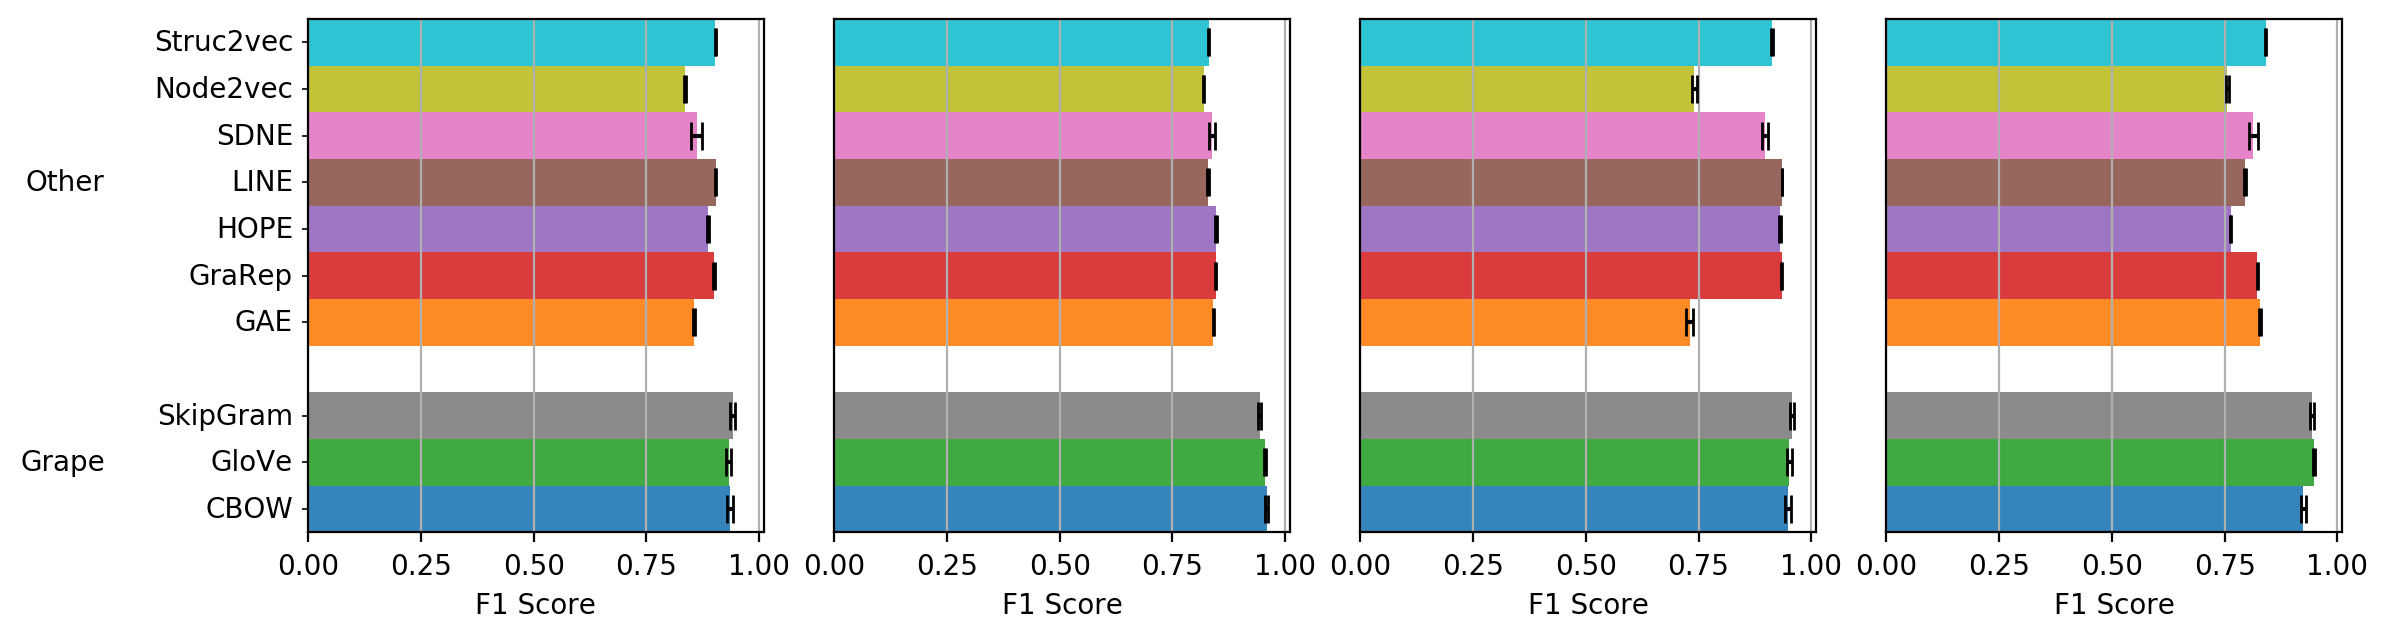

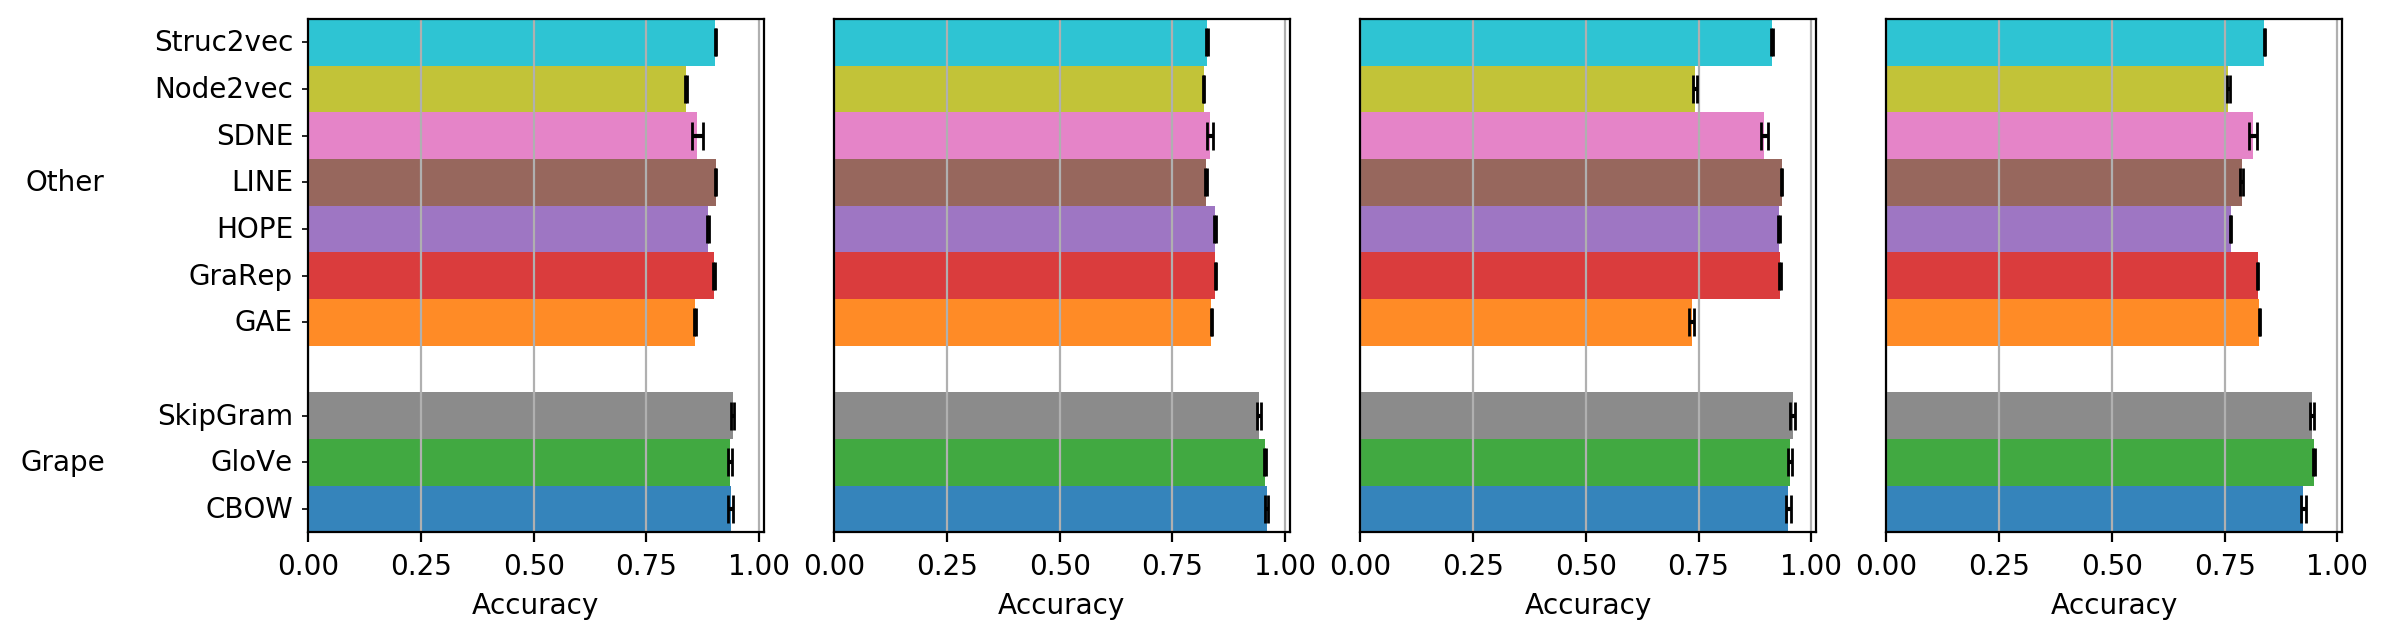

In [8]:
_ = barplots(
    all_results,
    height=3,
    subplots=True,
    path='comparison_barplots/{feature}.png',
    orientation="horizontal",
    use_multiprocessing=False,
    show_legend=False,
    unique_minor_labels=True,
    show_title=False
)

Rendering barplots:   0%|          | 0/3 [00:00<?, ?it/s]

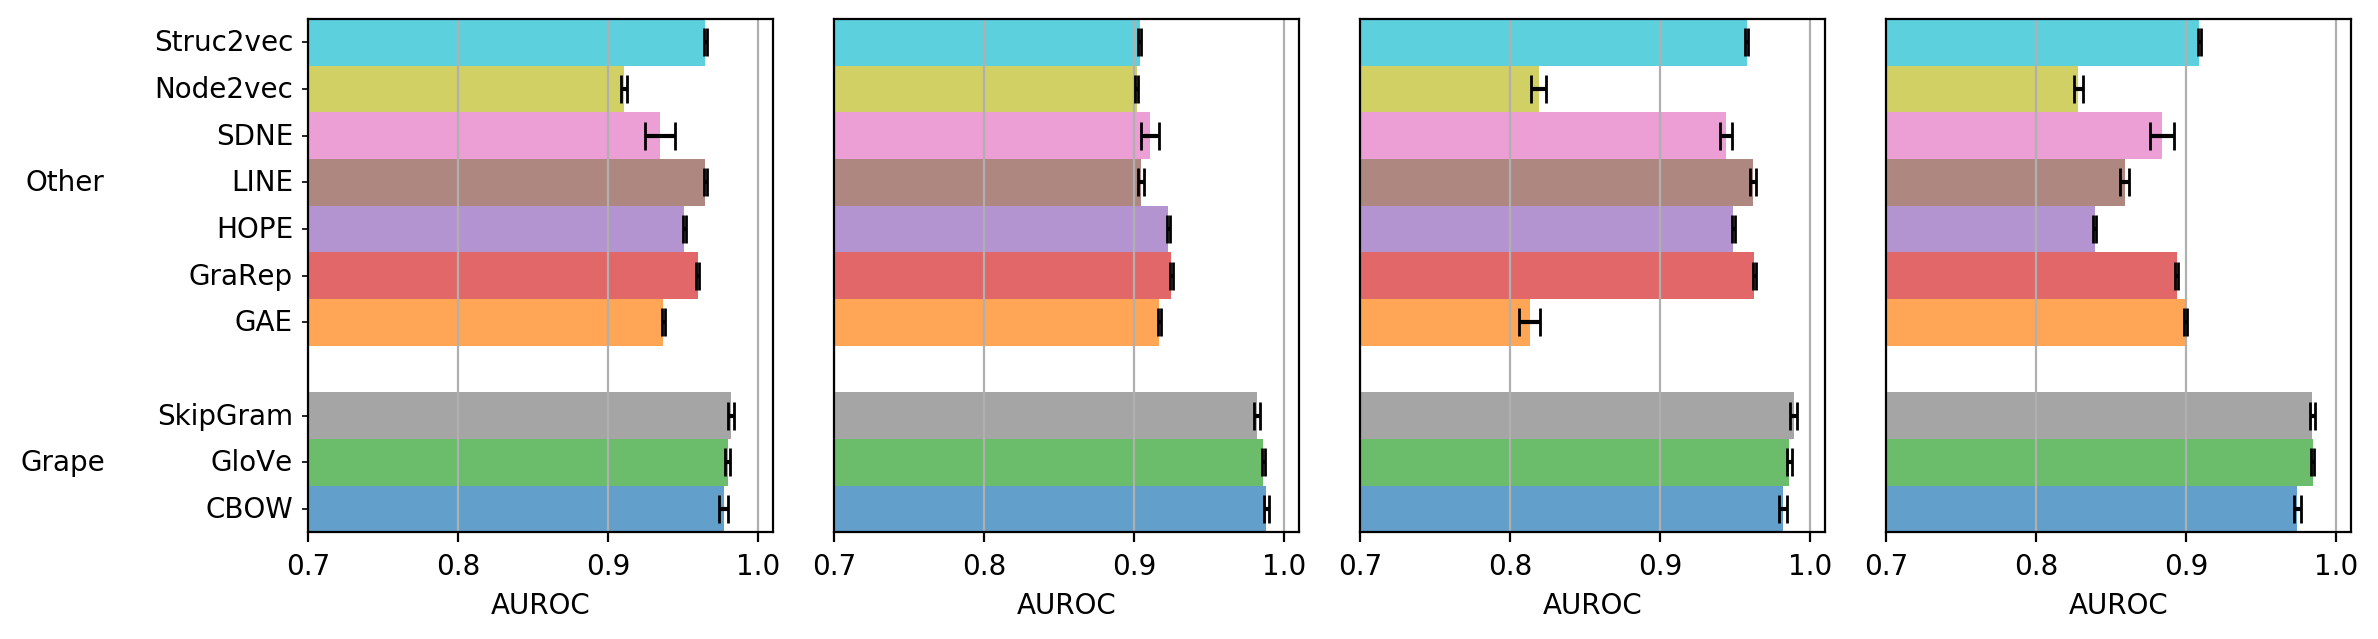

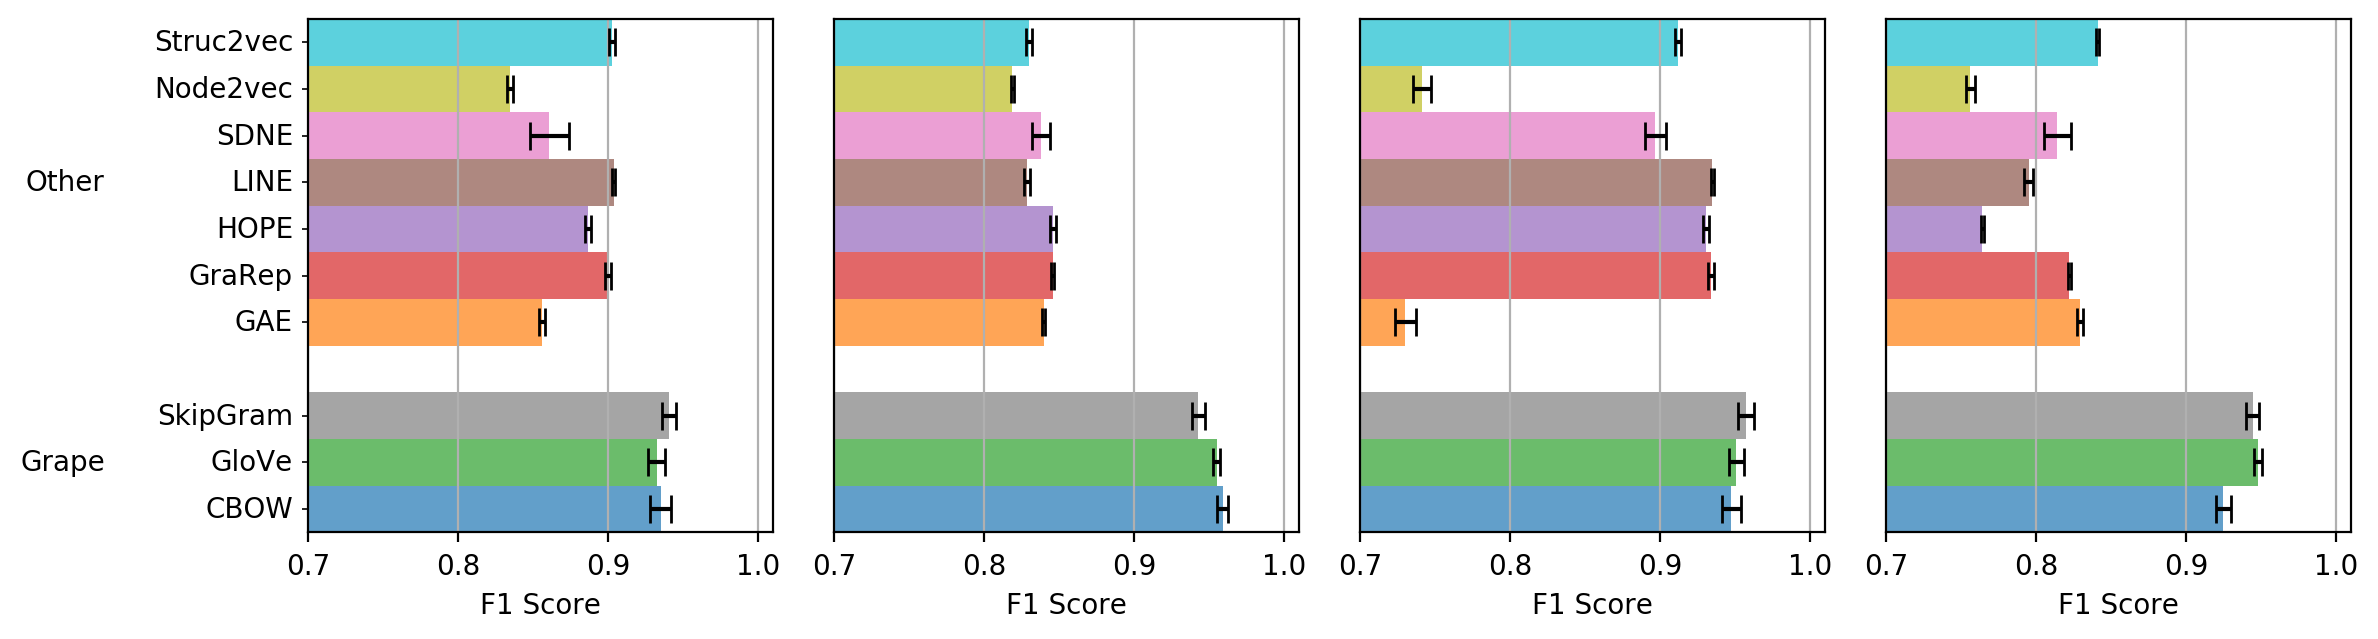

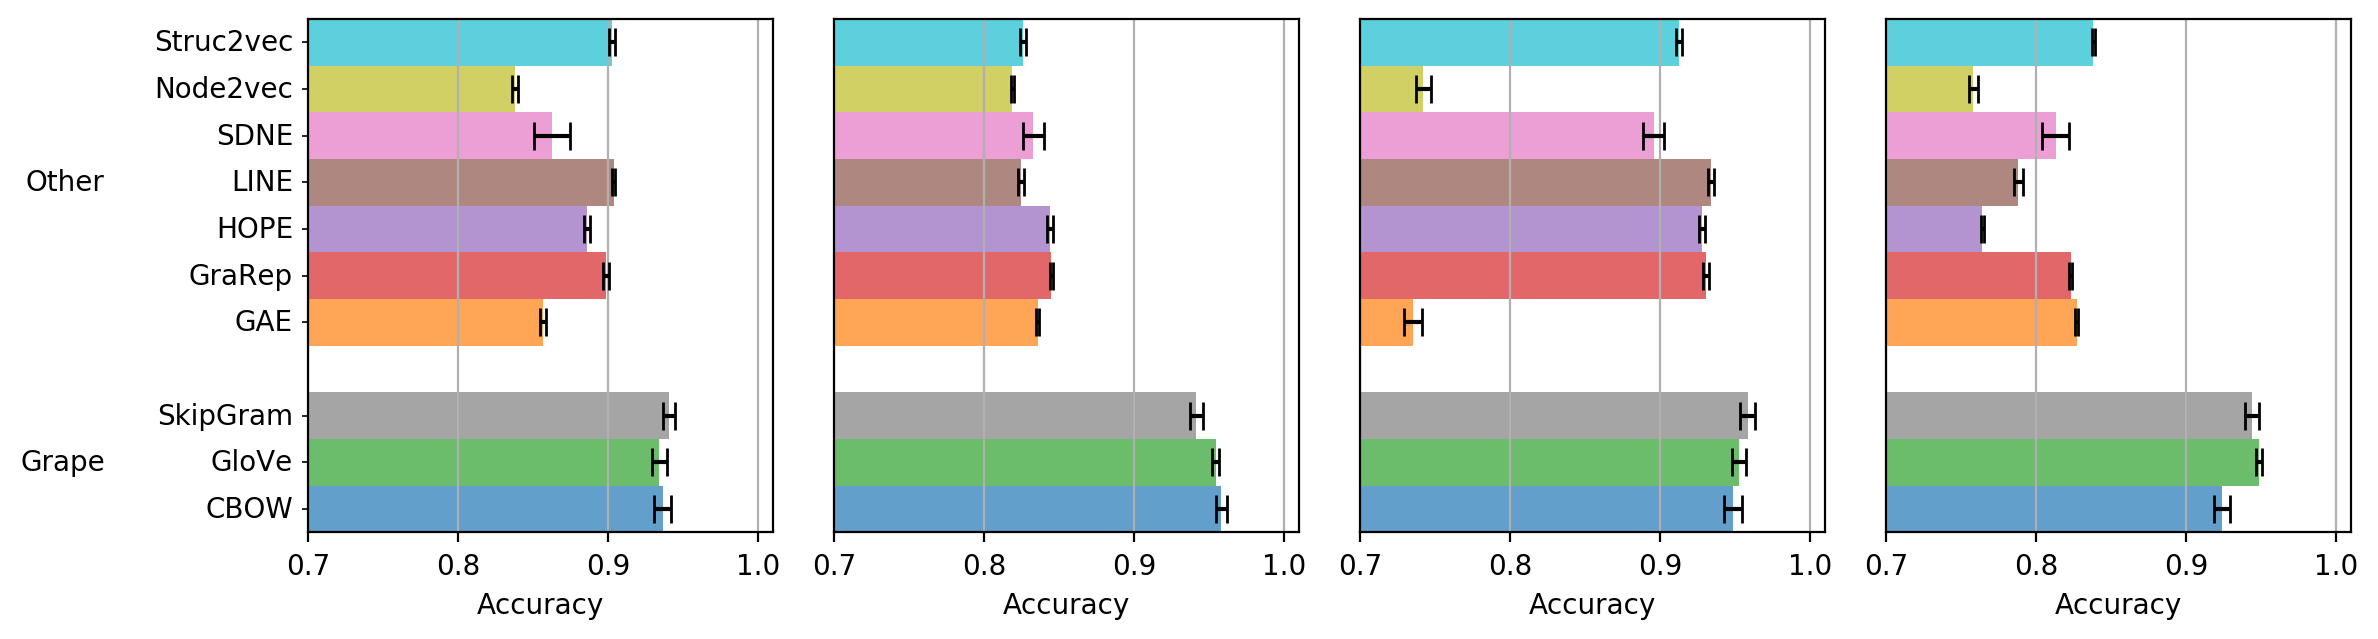

In [9]:
_ = barplots(
    all_results,
    height=3,
    min_value=0.7,
    subplots=True,
    path='zoomed_comparison_barplots/{feature}.png',
    orientation="horizontal",
    use_multiprocessing=False,
    show_legend=False,
    unique_minor_labels=True,
    show_title=False,
    alphas={
        "Other": 0.7
    }
)